## Analyzing the World Happiness Data

### Computing linear regressions among variables


In this exercise, we will compute linear regressions among some of the variables in the WHR dataset.  To do so, we will use the ```statsmodels``` package, which provides a broad array of techniques for statistical analysis and modeling.

As before, we'll repeat here some of the code developed in previous exercises so that we can continue to work with data in this exercise. Execute the next few code cells to load and reconfigure the data. Rather than examining the full dataset, we will just examine the data from 2015-2017, which we will store in a dataframe named ```df1517```.

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [31]:
dfraw = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Table2.1')

In [32]:
cols_to_include = ['country', 'year', 'Life Ladder', 
                   'Positive affect','Negative affect',
                   'Log GDP per capita', 'Social support',
                   'Healthy life expectancy at birth', 
                   'Freedom to make life choices', 
                   'Generosity', 'Perceptions of corruption']
renaming = {'Life Ladder': 'Happiness', 
            'Log GDP per capita': 'LogGDP', 
            'Social support': 'Support', 
            'Healthy life expectancy at birth': 'Life', 
            'Freedom to make life choices': 'Freedom', 
            'Perceptions of corruption': 'Corruption', 
            'Positive affect': 'Positive', 
            'Negative affect': 'Negative'}
df = dfraw[cols_to_include].rename(renaming, axis=1)
df1517 = df[df.year.isin(range(2015,2018))]
df1517.head()

,country,year,Happiness,Positive,Negative,LogGDP,Support,Life,Freedom,Generosity,Corruption
7,Afghanistan,2015,3.98,0.55,0.34,7.47,0.53,51.69,0.39,0.09,0.88
8,Afghanistan,2016,4.22,0.56,0.35,7.46,0.56,52.02,0.52,0.06,0.79
9,Afghanistan,2017,2.66,0.50,0.37,7.46,0.49,52.34,0.43,-0.11,0.95
17,Albania,2015,4.61,0.69,0.35,9.30,0.64,68.69,0.70,-0.09,0.88
18,Albania,2016,4.51,0.68,0.32,9.34,0.64,68.87,0.73,-0.02,0.90


### Step 1

The World Happiness Report is generally interested in how self-reported Happiness (Life Ladder) is dependent on the variety of different factors that they measure (LogGDP, Support, Life, etc.).  The report carries out a detailed analysis explaining how much of each country's Happiness can be ascribed to each of the explanatory factors.  We will consider later the specific analysis carried out in the WHR, but start here with a simpler analysis.

As noted, we'll use the statsmodels package, which is described [here in more detail](https://www.statsmodels.org/stable/index.html).  We'll start by importing the statsmodels API (application programming interface), which is conventionally imported with the shorter name ```sm```.

In [6]:
import statsmodels.api as sm

### Step 2

In previous exercises, we looked at the relationship between Happiness and LogGDP in the WHR data, and saw that they were generally well correlated.  Let's first revisit a plot we made in a previous exercise demonstrating the this relationship.

Execute the code cell below and examine the output.

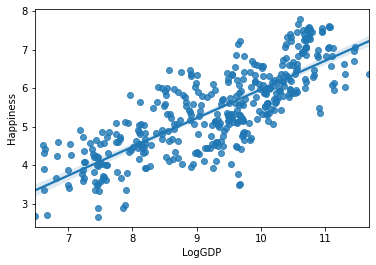

In [5]:
sns.regplot(x='LogGDP', y='Happiness', data=df1517)

### Step 3

Visually, the relationship between the two variables plotted above looks something like a line, albeit with a fair amount of jitter above and below that line.  

Linear regression is a method that estimates a relationship between two variables by fitting a line to data points relating those variables.  That is, given a set of data points relating two variables, linear regression creates a <b>model</b> of the data by assuming that the data relationship is well described by a straight line &mdash; more specifically, a straight line *is* the model of the data.  Given our assumption that a line is a good description of the data relationship, we need to identify what is the specific line that best fits our particular dataset.

Mathematically, a line relating an independent variable $x$ and a dependent variable $y$ is characterized by two parameters: the slope and the y-intercept.  Mathematically, we might write:
$$y = \beta x + y_0$$
where $\beta$ represents the slope and $y_0$ represents the y-intercept.  The y-intercept is where the line crosses the y-axis (i.e., for $x = 0$), and the slope indicates how a change $\Delta x$ in the independent variable corresponds to a change $\Delta y$ in the dependent variable (the slope is given by $\beta = \Delta_y/\Delta_x$).

In our case, we are interested in quantifying the relationship between Happiness and LogGDP, so we are interested in a specific model of the form:

$${\rm Happiness} = \beta * {\rm LogGDP} + y_0$$

Linear regression attempts to find the <b>best-fit line</b> that minimizes the least-squares error, that is, the difference between the actual data and the model prediction given by the equation above, summed over all data points. That is, linear regression produces a specific estimate for the parameters $\beta$ and $y_0$ that does the best job of fitting the data points.

Visually, we can see that the slope of the general trend in the data is approximately equal to 1, because the y-axis increases by around 4 units (Happiness increasing from approximately 3 to 7) at the same time that the x-axis also increases by around 4 units (LogGDP going from 7 to 11).  It is harder to estimate the y-intercept of the dataset, since at LogGDP=7, the data are far from the y-axis at $x = 0$.  You should recognize that some estimates for the model parameters $\beta$ and $y_0$ would do a poor job of describing the data.  If we chose the slope to be $\beta=100$, for example, then our model would be predicting a much more rapid rise than we see in the actual data.  Or if we chose a very large y-intercept such as $y_0=1000$, the model predictions would lie far above the data.  But we don't need to rely on visual inspection, since we can use tools such as statsmodels to estimate these model parameters numerically.  (This is part of a general process typically referred to as "parameter estimation" or "estimating parameters from data", but it should be recognized that parameter estimation always occurs within the context of some assumed model, such as the straight line we are using here.)

The method from statsmodels that we will use specifically is called Ordinary Least Squares (OLS), which is the simplest of linear regression methods to estimate the parameters that minimize the least-squares error between the actual data and the model predictions.

In statsmodels, a fit to the slope $\beta$ will be carried out when you indicate what are the dependent and independent variables.  Statsmodels (and others) use a somewhat [different terminology](https://www.statsmodels.org/stable/endog_exog.html): what we have been calling the independent variable, statsmodels call the "exogenous" variable, and our dependent variable is the "endogenous" variable in statsmodels.  By default, statsmodels will not attempt to fit the y-intercept $y_0$, but that can be triggered by augmenting the dataset, as described in more detail below.  


In the code cell below, carry out the following steps:

* Extract the Happiness data from ```df1517``` and assign it to the variable ```y```
* Extract the LogGDP data from ```df1517``` and assign it to the variable ```x```
* Print the values of x and y

Our goal will be to fit a straight line relating the data in ```y``` to the data in ```x```.

In [33]:
y = df1517['Happiness']
x = df1517['LogGDP']
print(x)
print(y)

7      7.47
8      7.46
9      7.46
17     9.30
18     9.34
       ... 
1548   8.20
1549   8.21
1559   7.56
1560   7.54
1561   7.54
Name: LogGDP, Length: 426, dtype: float64
7      3.98
8      4.22
9      2.66
17     4.61
18     4.51
       ... 
1548   4.35
1549   3.93
1559   3.70
1560   3.74
1561   3.64
Name: Happiness, Length: 426, dtype: float64


### Step 4

By default, statsmodels OLS will estimate one parameter or coefficient for each independent variable.  In our case, we have one independent variable (```x```), and we want to estimate the linear coefficient that relates ```x``` and ```y```, which we are calling $\beta$.  

But we also want OLS to estimate the y-intercept $y_0$.  In order to do so, we must augment the dataset by adding an additional column to the data in ```x``` so that OLS can separately estimate a y-intercept from that.  The mechanism that statsmodels uses to trigger this estimation is to add a constant column of ones to the independent variable, which OLS then interprets as a constant offset to the line it is fitting.  You might find it useful to consult the [statsmodels documentation on OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS).

In the code cell below:

* Use the ```sm.add_constant``` function to add a constant to ```x```, and assign the result back to ```x```
* Print the variable ```x```.  You should note that this now contains two columns, one labeled ```const``` (the constant we just added) and one labeled ```LogGDP```.

In [34]:
x = sm.add_constant(x)
print(x)
print(y)

      const  LogGDP
7      1.00    7.47
8      1.00    7.46
9      1.00    7.46
17     1.00    9.30
18     1.00    9.34
...     ...     ...
1548   1.00    8.20
1549   1.00    8.21
1559   1.00    7.56
1560   1.00    7.54
1561   1.00    7.54

[426 rows x 2 columns]
7      3.98
8      4.22
9      2.66
17     4.61
18     4.51
       ... 
1548   4.35
1549   3.93
1559   3.70
1560   3.74
1561   3.64
Name: Happiness, Length: 426, dtype: float64


### Step 5

Now that we've set up the basic elements of the data, let's carry out the regression.  Statsmodels works by creating objects that represent a model of the data: in this case, the model is OLS, or a least-squares straight-line fit to the data.  The basic workflow is to first create an OLS object that contains the specific x and y data values of interest, and then to fit the model to the data, which is the process by which the best-fit model parameters are estimated.  All model objects that one creates in statsmodels possess a ```fit``` method that carries out the process of fitting (parameter estimation).

In the code cell below:

* Use the ```sm.OLS``` function to create a model object to fit ```y``` to ```x```, and assign the result to the variable ```model```.  Also pass in the option ```missing='drop'``` to drop any observations with missing data in either x or y.  As before, you might find it useful to consult the [statsmodels documentation on OLS](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.OLS.html#statsmodels.regression.linear_model.OLS).
* Call the ```fit``` method on ```model``` to fit the model to the data, and store the output in ```results```
* Print the results of the fit, by calling the ```results.summary``` method.

## Graded Cell

This cell is worth 100% of the grade for this assignment.

In [38]:
model = sm.OLS(y,x, missing = 'drop')
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     708.9
Date:                Mon, 05 Aug 2024   Prob (F-statistic):           2.06e-91
Time:                        17:19:50   Log-Likelihood:                -422.66
No. Observations:                 412   AIC:                             849.3
Df Residuals:                     410   BIC:                             857.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4693      0.262     -5.613      0.000      -1.984      -0.955
LogGDP         0.7436      0.028     26.625      0.000       0.689       0.798
==============================================================================
Omnibus:                        2.653   Durbin-Watson:                   0.932
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.666
Skew:                          -0.160   Prob(JB):                        0.264
Kurtosis:                       2.769   Cond. No.                         74.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Self-Check

Run the cell below to test the correctness of your code above before submitting for grading.

In [39]:
# Run this self-test cell to check your code; do not add code or delete code in this cell
from jn import testRegression

try:
    print(testRegression(df1517, x, y, results))
except Exception as e:
    print("Error!\n" + str(e))


Correct!


### Step 6

The results summary produces a lot of information, and resembles the sort of information produced by many different statistics packages and programs.  Note at the top of the summary table that the "Dep. Variable" (dependent variable) is called Happiness.  The independent variable(s) are summarized in the middle panel where the estimated values of the slope and y-intercept are provided, which should look something like this:

<pre>
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4693      0.262     -5.613      0.000      -1.984      -0.955
LogGDP         0.7436      0.028     26.625      0.000       0.689       0.798
==============================================================================
</pre>

The first row of the table provided concerns the constant ("const") term, and the  second row describes the ```LogGDP``` part of the data.  Let's break this down in some further detail.

Each of the two rows contains a coefficient ('coef'): these are the parameters that we are trying to estimate.

The first row, labeled 'const', describes the y-intercept $y_0$ in our model, which is the coefficient ('coef') associated with the constant ('const') term.

The second row, labeled 'LogGDP', describes the slope $\beta$ in our model, which is the coefficient ('coef') associated with the LogGDP term.

In other words, using the data in the table above, OLS has identified that the best straight-line model fitting Happiness to LogGDP is:

$${\rm Happiness} = 0.7436 * {\rm LogGDP} - 1.4693$$

In the visual estimation of the slope we did above, we noted that the slope should be approximately equal to 1.  That turned out to be an over-estimate since the best-fit value is actually around 0.74, but it's not wildly off.

The table above also includes standard errors for each parameter estimate. These numbers convey how uncertain we should be in the parameters, i.e. higher standard errors correspond to more uncertainty. The y-intercept has a standard error of 0.262 and the slope has a standard error of 0.028. These values can be used to construct confidence intervals, although this topic is outside the scope of the current course.

Just because the fit indicates a positive relationship between Happiness and LogGDP does not necessarily mean that result is statistically significant.  That is similar to when we are presented with political polling data, in which two candidates might have polling averages that are close to each other, but within the "margin of error" of the poll.  A margin of error is a type of confidence interval: just because one candidate might have slightly higher polling numbers does not mean that result is statistically significant if the difference between the two candidates lies within the margin of error.

In order to assess the statistical significance of its parameter estimates, statsmodels carries out a t-test on these estimated coefficients.  This is a particular type of statistical test that compares the estimated coefficients with a statistical null model in which those coefficients are zero.  The ```t``` scores in the table above represent the number of standard errors the estimated coefficients are away from zero, and the probability ```P>|t|``` is the probability that one would estimate those values of the coefficients in the null model.  In other words, ```P>|t|``` estimates how likely it is that those estimated coefficients could actually be zero just by chance.  The fact that the probability ```P``` is zero out to at least three significant digits is indicative of the fact that these estimated coefficients are statistically significant and not equal to zero.  (The values of these probability estimates are contained in the ```pvalues``` attribute of the ```results``` object.)  Also presented is the 95% confidence interval (CI) for these estimates, showing the interval associated with the quantiles at 0.025 and 0.975, that is, the interval in which 95% of the estimates lie within.

### Step 7

We can plot the data and the fit together using some of the statsmodels graphics functionality.  Since we'll want to plot both the data and the fit, we will plot one of them first, store the plot figure object in a variable we can reuse, and then plot the other.

In the code cell below:

* Plot the model results via a call to ```sm.graphics.abline_plot```, passing in the results object computed above in the ```model_results``` option, and assign the plot output to the variable ```fig```
* Extract the relevant plotting axes with the following expression: ```ax = fig.axes[0]```
* Call the method ```ax.scatter``` with two arguments to plot Happiness versus LogGDP (recall that LogGDP is now a particular column in the variable ```x``` that you have created: `x['LogGDP']`)
* Your plot should look like this:<br> 
<img src="step7Plot.png" height="300" width="300" align="left"/>

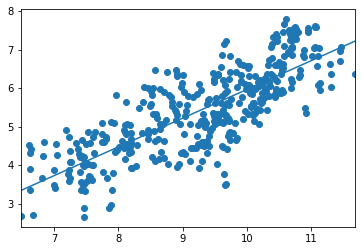

In [48]:
fig = sm.graphics.abline_plot(model_results = results)
ax = fig.axes[0]
ax.scatter(x['LogGDP'],y)

### Step 8

We are not just interested in how Happiness depends on LogGDP, but how it relates to the full set of explanatory variables collected in the WHR data: LogGDP, Support, Life, Freedom, Generosity, and Corruption.  To analyze this full set of dependencies, we can set up a multivariate linear regression, which aims to fit a dependent response variable $Y$ to a group of independent variables $X$, by assuming that $Y$ depends on each individual variable $X_i$ separately and in a linear manner.  Instead of a single slope $\beta$ as in the simple, univariate regression problem, there will now be a separate slope for each explanatory variable.

In the code cell below, first set up the data for the multivariate regression problem, similar as to what we did above:

* Assign to the variable ```explanatory_vars``` the list of column labels for the explanatory variables of interest
* Assign to the variable ```Y``` the data contained in the Happiness column in the ```df1517``` dataframe
* Assign to the variable ```X``` the data contained in the columns listed in `explanatory_vars` (hint: use the `explanatory_vars` list to index into the ```df1517``` dataframe)
* Add a constant column to the exogenous data `X`
* Print the value of ```X``` to verify that it has been constructed correctly

In [49]:
explanatory_vars = ['LogGDP', 'Support', 'Life', 'Freedom', 'Generosity', 'Corruption']
Y = df1517['Happiness']
X = df1517[explanatory_vars]
X = sm.add_constant(X)
print(X)

      const  LogGDP  Support  Life  Freedom  Generosity  Corruption
7      1.00    7.47     0.53 51.69     0.39        0.09        0.88
8      1.00    7.46     0.56 52.02     0.52        0.06        0.79
9      1.00    7.46     0.49 52.34     0.43       -0.11        0.95
17     1.00    9.30     0.64 68.69     0.70       -0.09        0.88
18     1.00    9.34     0.64 68.87     0.73       -0.02        0.90
...     ...     ...      ...   ...      ...         ...         ...
1548   1.00    8.20     0.77 53.27     0.81        0.11        0.77
1549   1.00    8.21     0.74 53.80     0.82        0.13        0.74
1559   1.00    7.56     0.74 50.93     0.67       -0.09        0.81
1560   1.00    7.54     0.77 51.80     0.73       -0.07        0.72
1561   1.00    7.54     0.75 52.67     0.75       -0.07        0.75

[426 rows x 7 columns]


### Step 9

Similar to what we did above, now let's create an OLS model for the multivariate regression.  In the code cell below:

* Create an OLS model to fit ```Y``` to ```X```, dropping any missing data in the process, and assign the result to the variable ```model2```
* Fit ```model2``` and assign the output to ```results2```
* Print the summary of the results in ```results2```

In [50]:
model2 = sm.OLS(Y,X, missing = 'drop')
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     198.0
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.19e-112
Time:                        17:31:51   Log-Likelihood:                -316.55
No. Observations:                 380   AIC:                             647.1
Df Residuals:                     373   BIC:                             674.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1781      0.384     -5.679      0.000      -2.932      -1.424
LogGDP         0.2939      0.056      5.211      0.000       0.183       0.405
Support        2.6250      0.352      7.458      0.000       1.933       3.317
Life           0.0310      0.008      3.975      0.000       0.016       0.046
Freedom        1.5603      0.269      5.810      0.000       1.032       2.088
Generosity     0.3129      0.198      1.578      0.115      -0.077       0.703
Corruption    -0.5180      0.192     -2.704      0.007      -0.895      -0.141
==============================================================================
Omnibus:                       12.701   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.036
Skew:                          -0.425   Prob(JB):                      0.00148
Kurtosis:                       3.316   Cond. No.                         992.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 10

Examine the output in the multivariate results summary.  Estimates of coefficients, standard errors, t scores and p values are now provided for all of the explanatory variables, as well as the overall intercept.  Note that the estimates for the intercept and the LogGDP slope are different than was the case in the simple regression.  That is typical, since multivariate regression accounts for relationships between each independent and dependent variable once all the other data relationships are taken into account.

We can see from the summary results that all of the coefficient estimates are significant at a value P < 0.05, except for the relationship between Happiness and Generosity (P = 0.115).

In carrying out a couple OLS analyses, we have just scratched the surface of the [functionality provided by statsmodels](https://www.statsmodels.org/stable/examples/index.html).